In [17]:
# importing packages
import pandas as pd
import dateutil
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import geopandas
import spacy
import re

In [15]:
# Praparing the the searchterm lemmas 
# Writing Spacy Lemmatizer for lists function
def spacy_list_lemmatizer(text, nlp):
    nlp.disable_pipes('tagger', 'ner')
    doclist = list(nlp.pipe(text, n_threads=3,  batch_size=50))
    docs=[]
    for i, doc in enumerate(doclist):
        docs.append(' '.join([listitem.lemma_ for listitem in doc]))
    return docs


# creating the lemmas of all english co-searchterms
searchterms_eng = ['"agile" capability', '"agile" ceremony', '"agile" certificate', '"agile" certification', '"agile" coach', '"agile" coaching', '"agile" delivery', '"agile" development', '"agile" digital capability ', '"agile" environment', '"agile" innovation', '"agile" management', '"agile" manifesto', '"agile" method', '"agile" methodology', '"agile" mindset', '"agile" operating model', '"agile" organisation', '"agile" organization unit', '"agile" principle', '"agile" processes', '"agile" programming', '"agile" project', '"agile" project management', '"agile" software development', '"agile" stages', '"agile" structures', '"agile" team', '"agile" techniques', '"agile" transformation', '"agile" transition', '"agile" Value', '"agile" walls', '"agile" way', '"agile" way of working', '"agile" work', '"agile" work practices', '"agile" working and management methods', '"agile" working culture', "'agile' capability", "'agile' ceremony", "'agile' certificate", "'agile' certification", "'agile' coach", "'agile' coaching", "'agile' delivery", "'agile' development", "'agile' digital capability ", "'agile' environment", "'agile' innovation", "'agile' management", "'Agile' Manifesto", "'agile' method", "'agile' methodology", "'agile' mindset", "'agile' operating model", "'agile' organisation", "'agile' organization unit", "'agile' principle", "'agile' processes", "'agile' programming", "'agile' project", "'agile' project management", "'agile' software development", "'agile' stages", "'agile' structures", "'agile' team", "'agile' techniques", "'agile' transformation", "'agile' transition", "'agile' Value", "'agile' walls", "'agile' way", "'agile' way of working", "'agile' work", "'agile' work practices", "'agile' working and management methods", "'agile' working culture", "backlog", "co-design", "collaboration spaces", "collaborative design", "cross-departmental approach", "daily scrum", "definition of done", "definition of ready", "design thinking", "development team", "empathy map", "extreme user", "fail fast", "fail forward", "free of hierarchy", "hierarchy free space", "innovation culture", "innovation management", "iteration", "iterative", "kanban board", "lean software development", "lean start up", "lean start-up", "lean startup", "minimum viable product", "MVP", "new team and management structures", "new work", "new working methods", "planning poker", "product backlog", "product owner", "project canvas", "project-based", "scrum", "scrum coach", "scrum master", "scrum team", "service design", "short-cycle results", "software development", "sprint", "sprint backlog", "sprint planning", "sprint retrospective", "sprint review", "time box", "timeboxing", "user needs", "user requirements", "user research", "user story", "user testing", "user-centred design", "user-friendly solutions", "user-oriented", "visual thinking", "whiteboard", "wicked problem", "wireframe", "workshop"]

nlp_eng = spacy.load("en_core_web_sm")

searchterms_eng_lemma = spacy_list_lemmatizer(searchterms_eng, nlp_eng)

# creating the lemmas of all german co-searchterms
searchterms_de = ["abteilungsübergreifender Ansatz", "'agil' arbeitende Organisationseinheit", "'agil' arbeitende Teams", "'agile' Arbeitsformen", "'agile' arbeitskultur", "'agile' Arbeitspraktiken", "'agile' arbeitsumgebung", "'agile' Arbeitsweise", "'agile' Bereitstellung", "'agile' digitale Fähigkeit ", "'agile' Entwicklung", "'agile' Fähigkeiten ", "'agile' Innovation", "'agile' Methode", "'agile' Methodik", "'agile' Organisation", "'agile' Phasen", "'agile' Prozesse", "'agile' Softwareentwicklung", "'agile' Softwareweiterentwicklung", "'agile' Strukturen", "'agile' Techniken", "'agile' Transformation", "'agile' Transition", "'agile' Wände", "'agile' Weise", "'agile' Zeremonie", "'agile' Zertifizierung", "'agilen' Arbeits- und Managementmethoden", "'agiler' Ansatz", "'agiler' Coach", "'agiler' Wert", "'agiles' Arbeiten", "'agiles' Betriebsmodell", "'agiles' Coaching", "'agiles' Management", "'agiles' Manifest", "'agiles' Mindset", "'agiles' Prinzip", "'agiles' Programmieren", "'agiles' Projekt", "'agiles' Projektmanagement", "'agiles' Team", "'agiles' Training ", "'agiles' Zertifikat", '"agil" arbeitende Organisationseinheit', '"agil" arbeitende Teams', '"agile" Arbeitsformen', '"agile" arbeitskultur', '"agile" Arbeitspraktiken', '"agile" arbeitsumgebung', '"agile" Arbeitsweise', '"agile" Bereitstellung', '"agile" digitale Fähigkeit ', '"agile" Entwicklung', '"agile" Fähigkeiten ', '"agile" Innovation', '"agile" Methode', '"agile" Methodik', '"agile" Organisation', '"agile" Phasen', '"agile" Prozesse', '"agile" Softwareentwicklung', '"agile" Softwareweiterentwicklung', '"agile" Strukturen', '"agile" Techniken', '"agile" Transformation', '"agile" Transition', '"agile" Wände', '"agile" Weise', '"agile" Zeremonie', '"agile" Zertifizierung', '"agilen" Arbeits- und Managementmethoden', '"agiler" Ansatz', '"agiler" Coach', '"agiler" Wert', '"agiles" Arbeiten', '"agiles" Betriebsmodell', '"agiles" Coaching', '"agiles" Management', '"agiles" Manifest', '"agiles" Mindset', '"agiles" Prinzip', '"agiles" Programmieren', '"agiles" Projekt', '"agiles" Projektmanagement', '"agiles" Team', '"agiles" Training ', '"agiles" Zertifikat', "Backlog", "Co-Design", "Co-Kreation", "Daily Scrum", "Definition of Done", "Definition of Ready", "Design Thinking", "Empathy Map", "Entwicklungsteam", "Extremnutzer Nutzer", "fail fast", "fail forward", "hierarchiefrei", "hierarchiefreien Raum", "Innovationskultur", "Innovationsmanagement", "Iteration", "iterativ ", "Kanbanboard", "Kollaborationsräume", "kollaboratives Design", "kurzzyklische Ergebnisse", "Lean Start up", "Lean Start-up", "Lean Startup", "Minimum Viable Product", "MVP", "neue Arbeitsweisen", "neue Team- und Führungsstrukturen", "New Work",  "Nutzeranforderungen", "Nutzerbedürfnisse", "Nutzerforschung", "nutzerorientiert", "nutzerorientierte Lösungen", "Nutzerstory", "Nutzertest", "nutzerzentriertes Design", "Planning Poker", "Product Backlog", "Product Owner", "Project Canvas", "Projektbasiert", "schlanke Softwareentwicklung", "Scrum", "Scrum Coach", "Scrum Master", "Scrum Team", "Service Design", "software entwicklung", "Sprint", "Sprint Backlog", "Sprint Planning", "Sprint Retrospective", "Sprint Review", "Timebox", "Timeboxing", "visuelles Denken", "Whiteboard", "Wicked Problem", "Wireframe", "Workshop"]

nlp_de = spacy.load("de_core_news_sm")

searchterms_de_lemma = spacy_list_lemmatizer(searchterms_de, nlp_de)

searchterms_de_eng_lemma = searchterms_de_lemma + searchterms_eng_lemma



{'abteilungsübergreifender ansatz': 0, "' agil ' arbeitend organisationseinheit": 0, "' agil ' arbeitend team": 0, "' agil ' arbeitsformen": 0, "' agil ' arbeitskultur": 0, "' agil ' arbeitspraktiken": 0, "' agil ' arbeitsumgebung": 0, "' agil ' arbeitsweise": 0, "' agil ' bereitstellung": 0, "' agil ' digitale fähigkeit": 0, "' agil ' entwicklung": 0, "' agil ' fähigkeit": 0, "' agil ' innovation": 0, "' agil ' methode": 0, "' agil ' methodik": 0, "' agil ' organisation": 0, "' agil ' phase": 0, "' agil ' prozeß": 0, "' agil ' softwareentwicklung": 0, "' agil ' softwareweiterentwicklung": 0, "' agil ' struktur": 0, "' agil ' technik": 0, "' agil ' transformation": 0, "' agil ' transition": 0, "' agil ' winden": 0, "' agil ' weise": 0, "' agil ' zeremonie": 0, "' agil ' zertifizierung": 0, "' agil ' arbeits- und managementmethoden": 0, "' agil ' ansatz": 0, "' agil ' coach": 0, "' agil ' wert": 0, "' agil ' arbeit": 0, "' agil ' betriebsmodell": 0, "' agil ' coaching": 0, "' agil ' man

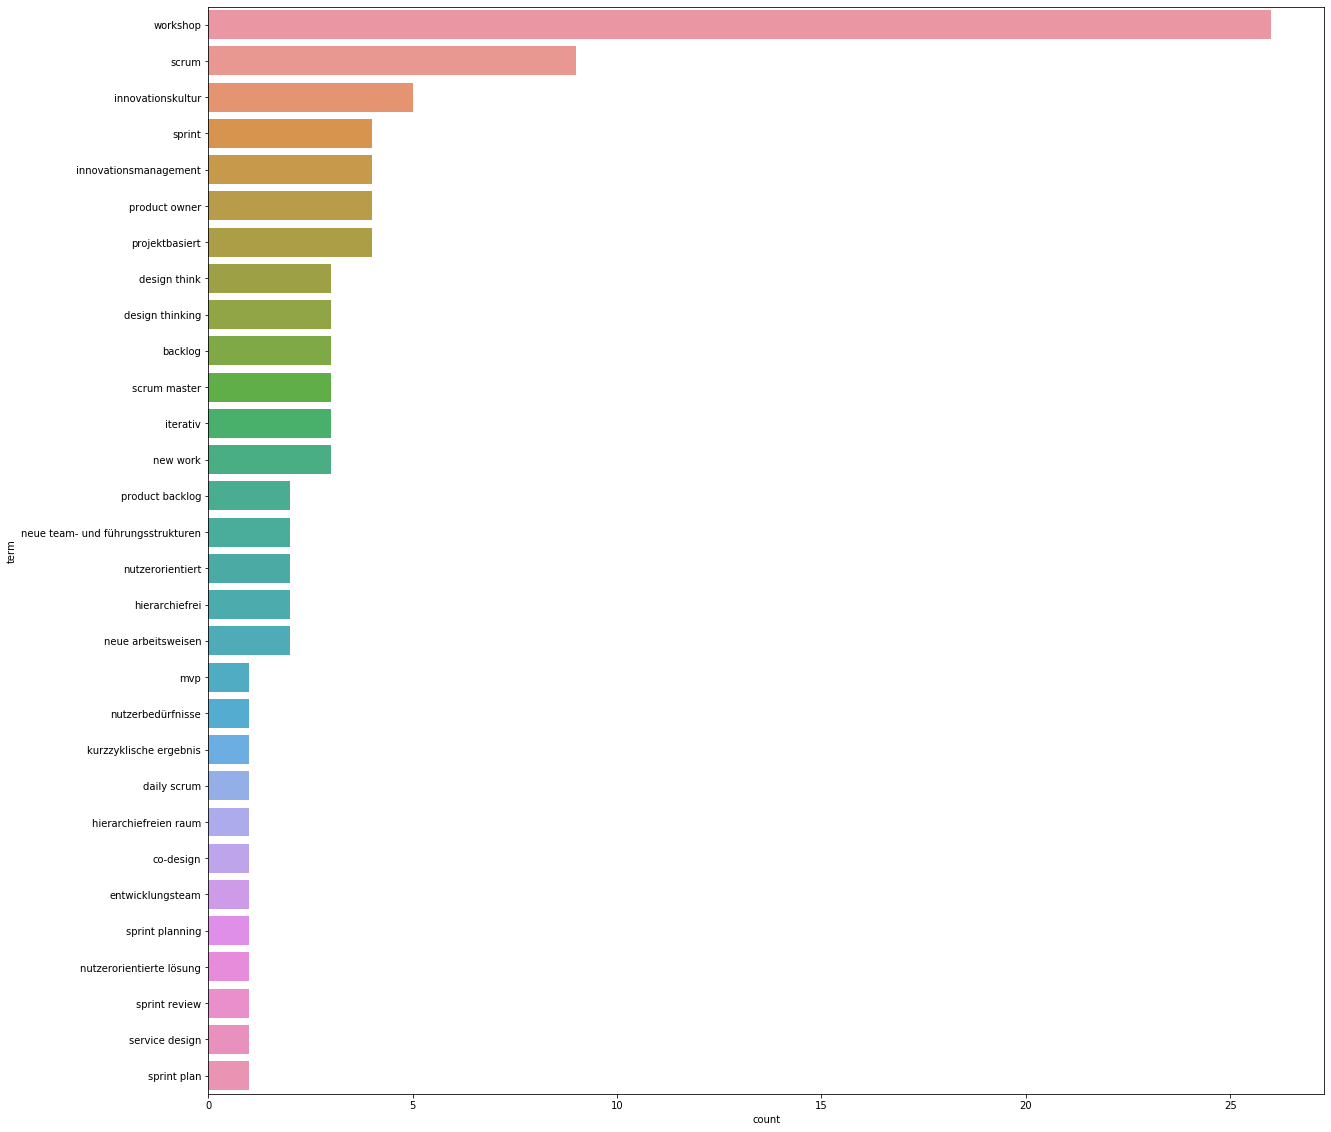

In [20]:
# plotting the co_occurence term frequency for Germany

df = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GitHubRepo/agile-in-government/Analysis/2_Data_Preprocessing/DATA/CSVs/Germany/Combined_cleaned.csv")

dict_count = {}

for term in searchterms_de_eng_lemma:
    dict_count[term.lower()] = len(df[df['co_searchterms_matches'].str.contains(term.lower(), flags = re.IGNORECASE)])
print(dict_count)

df_count = pd.DataFrame(dict_count.items(), columns = ["term", "count"])
df_count.sort_values(by="count", inplace=True, ascending=False)
df_count = df_count[df_count['count'] != 0]
plt.figure(figsize=(20,20))
sns.barplot(data=df_count, x="count", y="term", orient="h")


{'" agile " capability': 0, '" agile " ceremony': 0, '" agile " certificate': 0, '" agile " certification': 0, '" agile " coach': 0, '" agile " delivery': 0, '" agile " development': 0, '" agile " digital capability': 0, '" agile " environment': 0, '" agile " innovation': 0, '" agile " management': 0, '" agile " manifesto': 0, '" agile " method': 0, '" agile " methodology': 0, '" agile " mindset': 0, '" agile " operate model': 0, '" agile " organisation': 0, '" agile " organization unit': 0, '" agile " principle': 0, '" agile " process': 0, '" agile " programme': 0, '" agile " project': 0, '" agile " project management': 0, '" agile " software development': 0, '" agile " stage': 0, '" agile " structure': 0, '" agile " team': 0, '" agile " technique': 0, '" agile " transformation': 0, '" agile " transition': 0, '" agile " value': 0, '" agile " wall': 0, '" agile " way': 0, '" agile " way of work': 0, '" agile " work': 1, '" agile " work practice': 0, '" agile " work and management metho

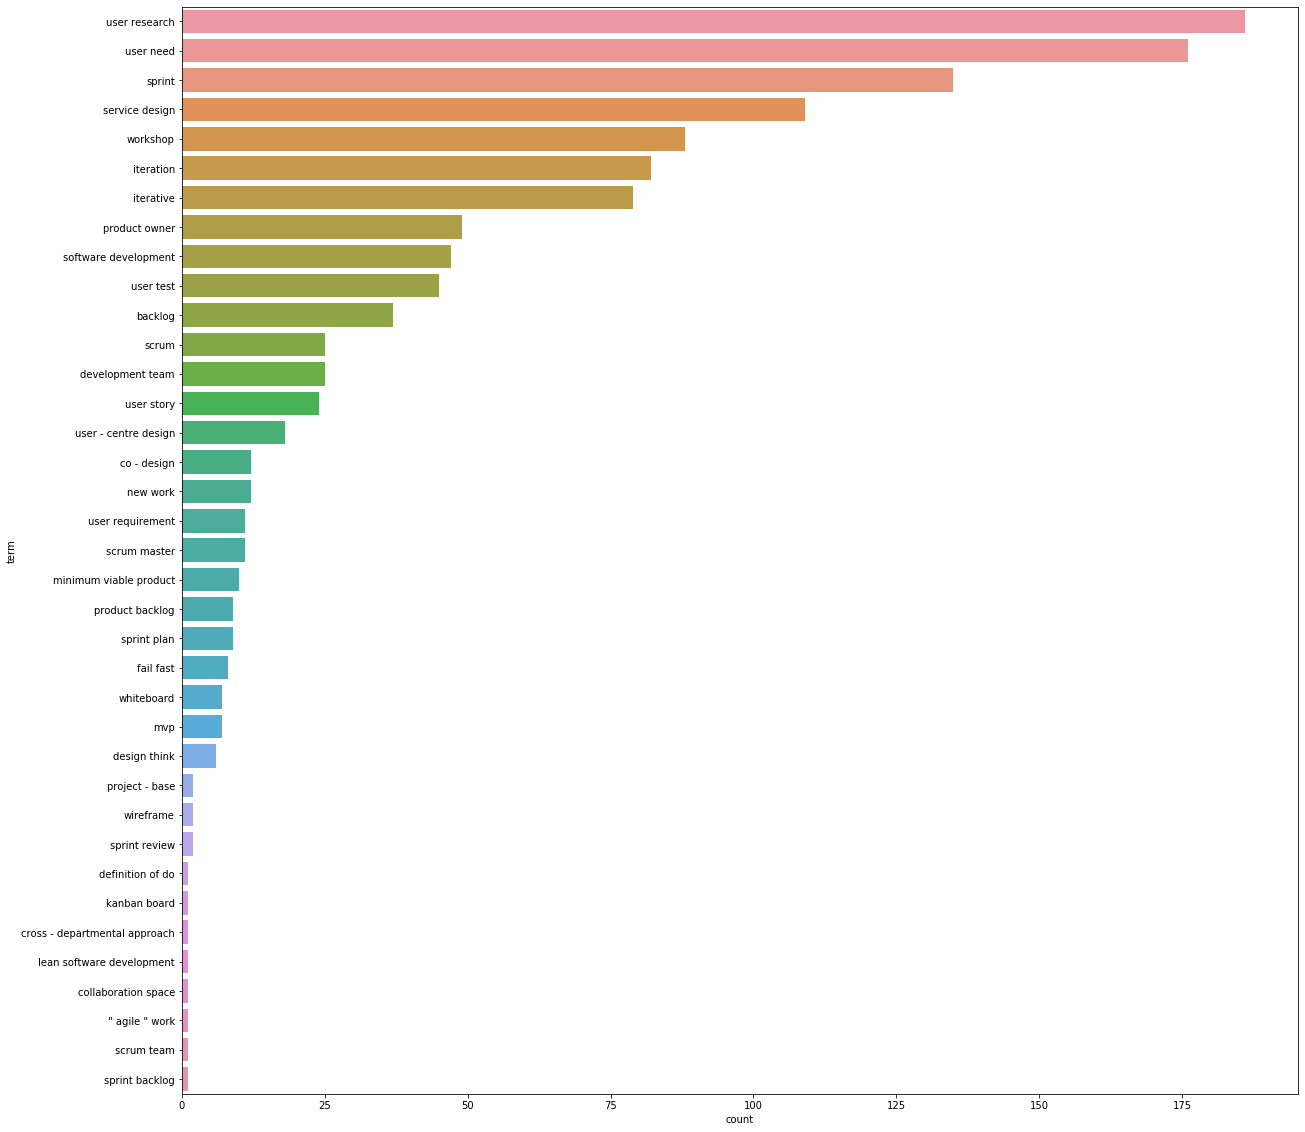

In [19]:
# plotting the co_occurence term frequency for the UK

df = pd.read_csv('/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GitHubRepo/agile-in-government/Analysis/2_Data_Preprocessing/DATA/CSVs/UK/General_cleaned_org.csv')

dict_count = {}

for term in searchterms_eng_lemma:
    dict_count[term.lower()] = len(df[df['co_searchterms_matches'].str.contains(term.lower(), flags = re.IGNORECASE)])
print(dict_count)

df_count = pd.DataFrame(dict_count.items(), columns = ["term", "count"])
df_count.sort_values(by="count", inplace=True, ascending=False)
df_count = df_count[df_count['count'] != 0]
plt.figure(figsize=(20,20))
sns.barplot(data=df_count, x="count", y="term", orient="h")

In [ ]:
# Testing for Visualisation

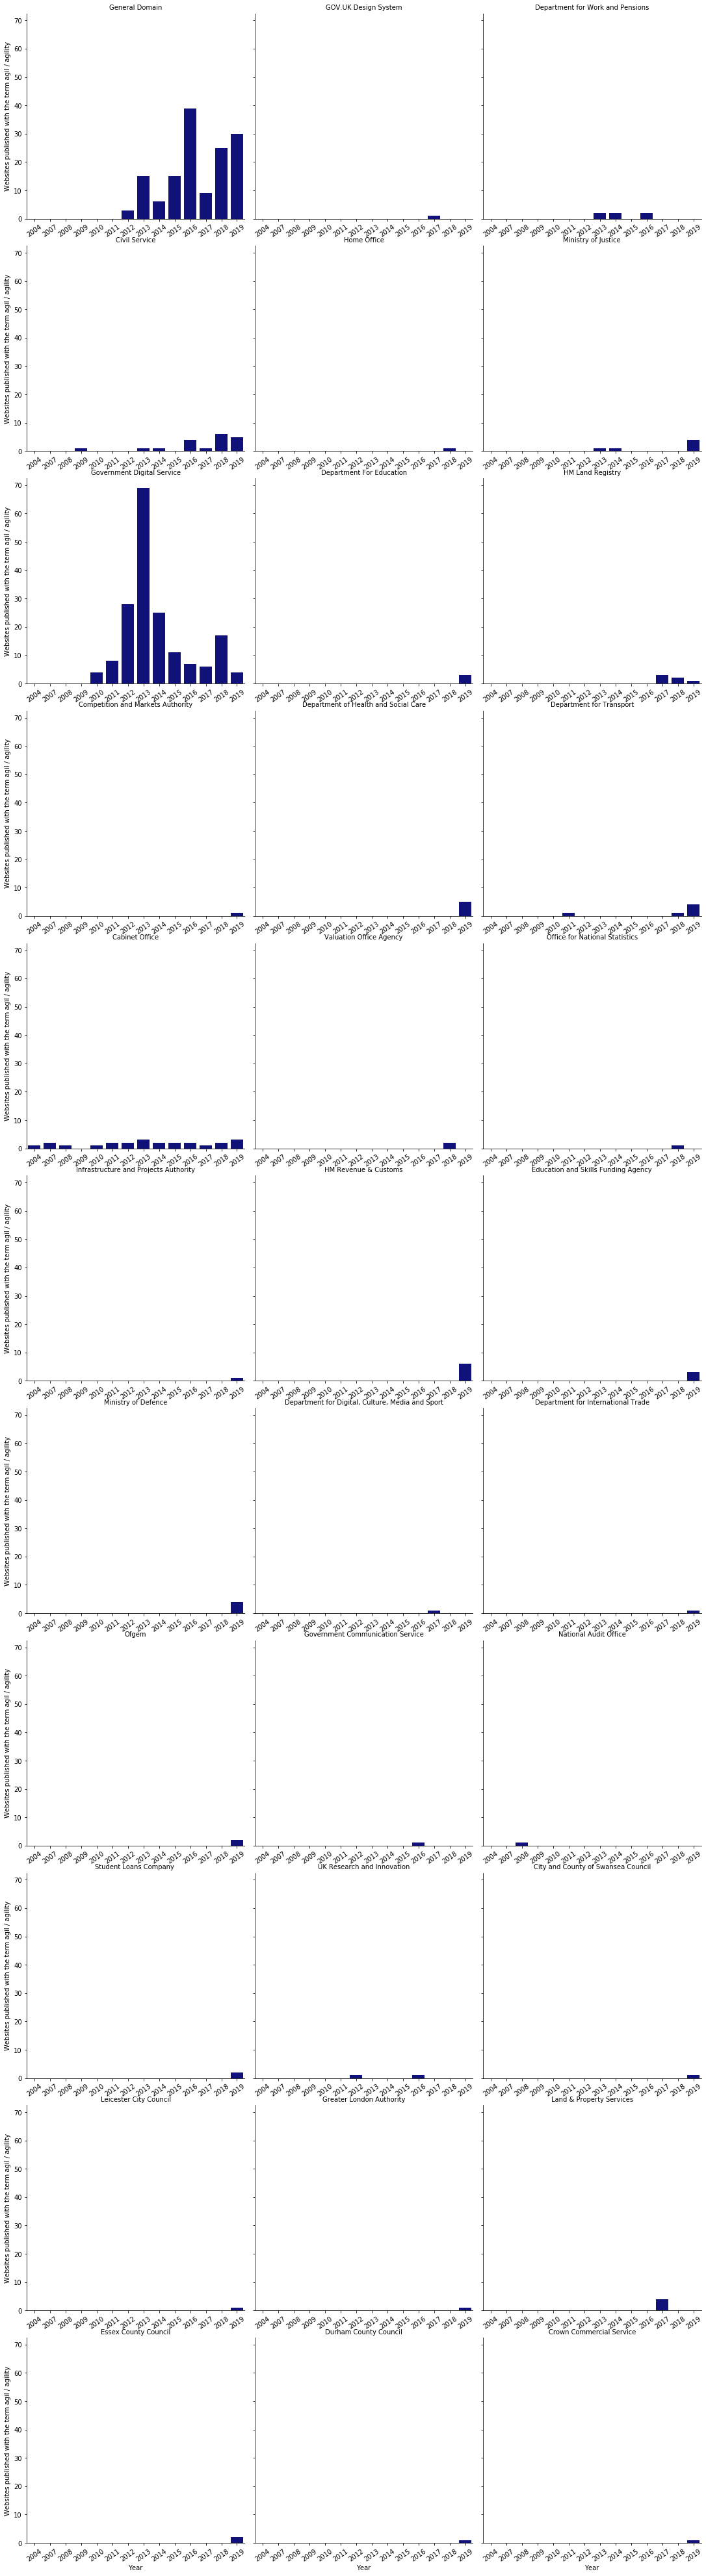

In [10]:
#Plotting UK
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GitHubRepo/agile-in-government/Analysis/2_Data_Preprocessing/DATA/CSVs/UK/General_cleaned_org.csv"
df=pd.read_csv(inputFileName, parse_dates=["final_date"])
df['Year'] = df['final_date'].dt.year
df2 = df.groupby(["Year"]).count()
df2.reset_index(inplace=True)
# g = sns.FacetGrid(df,col="Organisation", col_wrap=3)
# g.map(sns.factorplot,'Year')
plot = sns.catplot(x='Year', kind='count', data=df, col='Organisation', col_wrap=3, sharex=False, sharey=True, color='darkblue')
plot.set_xticklabels(rotation=35)
plot.set_ylabels(label="Websites published with the term agil / agility")
plot.set_titles("{col_name}")

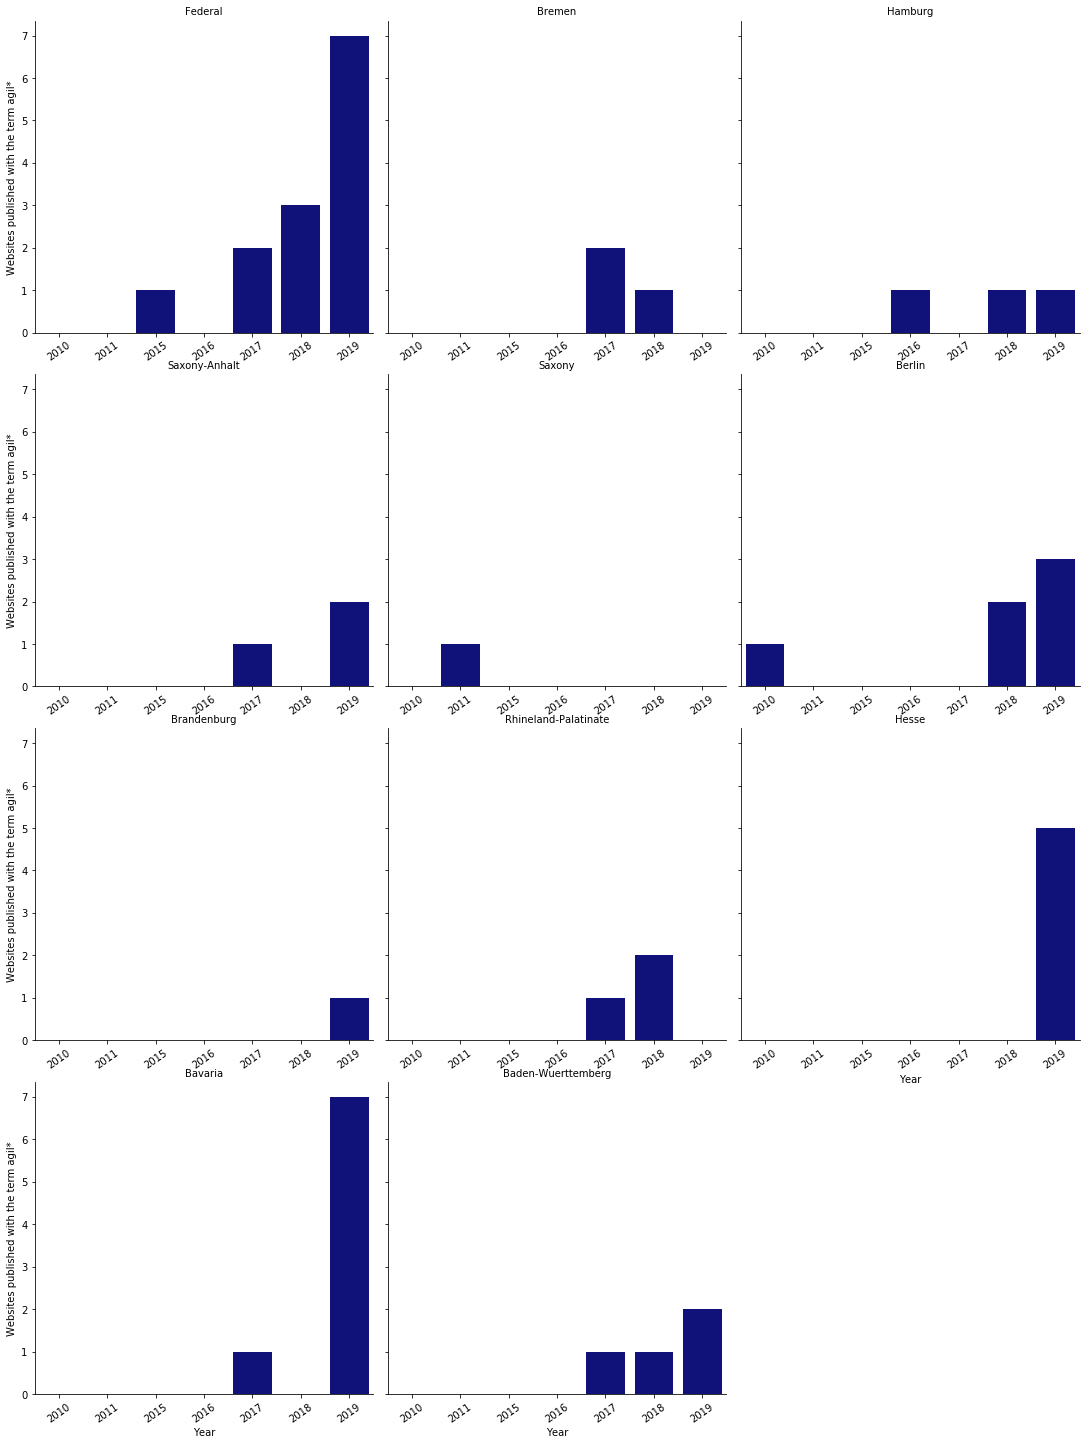

In [7]:
#Plotting per State Germany

inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GitHubRepo/agile-in-government/Analysis/2_Data_Preprocessing/DATA/CSVs/Germany/Combined_cleaned.csv"
df=pd.read_csv(inputFileName, parse_dates=["final_date"])
df['Year'] = df['final_date'].dt.year
df2 = df.groupby(["Year"]).count()
df2.reset_index(inplace=True)
plot = sns.catplot(x='Year', kind='count', data=df, col='level', col_wrap=3, sharex=False, sharey=True, color='darkblue')
plot.set_xticklabels(rotation=35)
plot.set_ylabels(label="Websites published with the term agil*")
plot.set_titles("{col_name}")

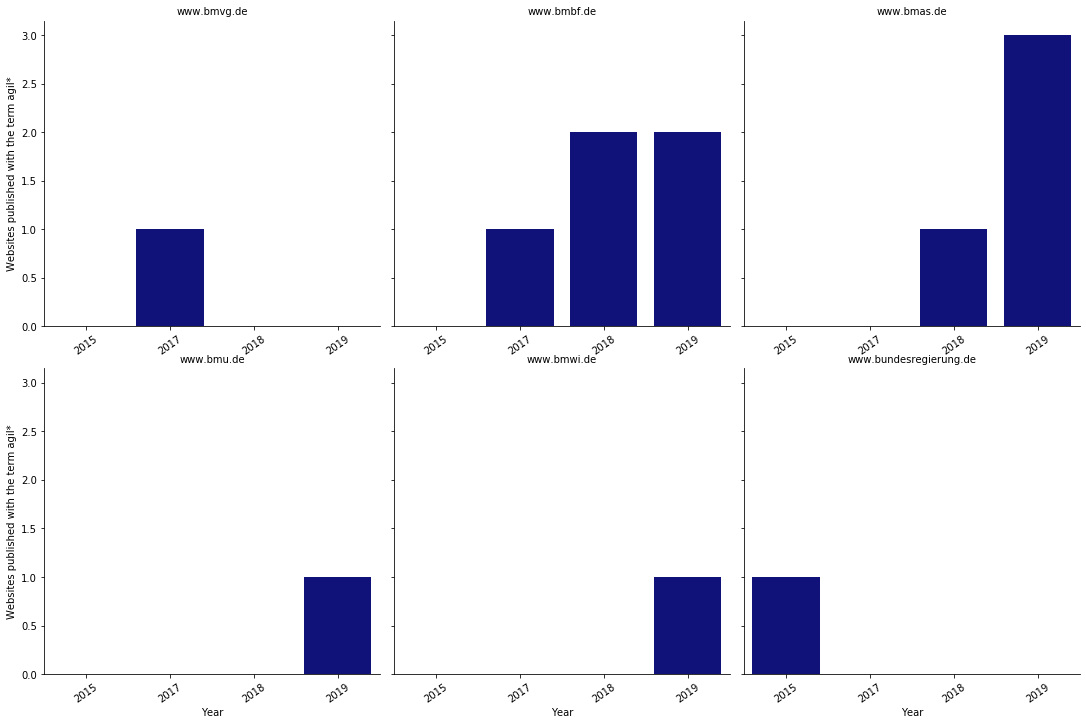

In [6]:
#Printing only Federal Level Ministries Geramany
inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GitHubRepo/agile-in-government/Analysis/2_Data_Preprocessing/DATA/CSVs/Germany/Combined_cleaned.csv"
df=pd.read_csv(inputFileName, parse_dates=["final_date"])
df = df[df['level'] == 'Federal']
df['Year'] = df['final_date'].dt.year
df2 = df.groupby(["Year"]).count()
df2.reset_index(inplace=True)
plot = sns.catplot(x='Year', kind='count', data=df, col='domain', col_wrap=3, sharex=False, sharey=True, color='darkblue')
plot.set_xticklabels(rotation=35)
plot.set_ylabels(label="Websites published with the term agil*")
plot.set_titles("{col_name}")

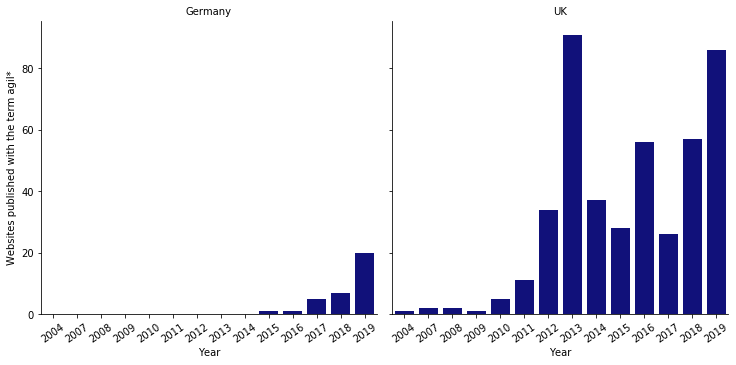

In [22]:
###### Comparing UK and Germany
inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GitHubRepo/agile-in-government/Analysis/2_Data_Preprocessing/DATA/CSVs/Master_File.csv"
df=pd.read_csv(inputFileName, parse_dates=["final_date"])
df['Year'] = df['final_date'].dt.year
df2 = df.groupby(["Year"]).count()
df2.reset_index(inplace=True)
plot = sns.catplot(x='Year', kind='count', data=df, col='country', col_wrap=3, sharex=False, sharey=True, color='darkblue')
plot.set_xticklabels(rotation=35)
plot.set_ylabels(label="Websites published with the term agil*")
plot.set_titles("{col_name}")



In [ ]:
# plotting Germany Federal levels on map

# set the filepath and load in a shapefile
fp = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GitHubRepo/agile-in-government/Analysis/3_Data_Analysis/Germany_Polygon.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()
#plotting the map to see how it looks like
map_df.plot()